In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# KLASIFIKACIJA

Za svaku supstancu postoji vise klasa koje mogu da se klasifikuju, stoga radice se klasifikacija svake supstance posebno

### UCITAVANJE I PREPROCESIRANJE PODATAKA
*deo koda uzet iz fajla za analizu podataka*

In [40]:
sirovi_podaci = pd.read_csv('drug_consumption.data')
sirovi_podaci #fale imena atributa

#procitano sa sajtu podataka 
kolone = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", 
            "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsiveness", "SS", 
            "Alchocol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstasy", 
            "Heroin", "Ketamin", "LegalH", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

sirovi_podaci = pd.read_csv('drug_consumption.data', names = kolone)

podaci = sirovi_podaci.copy()

#ID mi ne igra nikakvu ulogu svakako
podaci = podaci.drop('ID', axis = 1)


In [41]:
podaci
print(f'Broj istanci: {podaci.shape[0]}')
print(f'Broj atributa: {podaci.shape[1]}')
podaci.describe()

Broj istanci: 1885
Broj atributa: 31


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [42]:
podaci.isna().any().any() #nema nedostajucih vrednosti, sto je dobro

False

In [43]:
# posto imamo vise klasa koje ispitujemo, razdvajam podatke na atribute i na klase
podaci.head()

#izdvajanje atributa
atributi1 = podaci.columns
atributi1

atributi = []
for atribut in atributi1:
    if atribut == 'Alchocol':
        break
    atributi.append(atribut)
    
print(atributi, end = ', ')

['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness', 'SS'], 

In [44]:
#izdvajanje klasa
klase = []
for atribut in atributi1:
    if atribut not in atributi:
        klase.append(atribut)
        
print(klase, end = ', ')
print()

# provera deljenja kolona
print(len(klase) + len(atributi) == len(podaci.columns))

['Alchocol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Canabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'LegalH', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'], 
True


In [45]:
#skaliramo podatke
def skaliraj_podatke(X):
    return (X - min(X))/(max(X) - min(X))

In [46]:
skalirani_podaci = podaci.copy()
for a in atributi:
    skalirani_podaci[a] = skaliraj_podatke(skalirani_podaci[a])
    
#provera uspesnosti skaliranja
for a in atributi:
    print(len(skalirani_podaci[a].unique()) == len(podaci[a].unique()), end = ", ")
    
#nismo izgubili podatke

True, True, True, True, True, True, True, True, True, True, True, True, 

# KLASIFIKACIJA 

In [47]:
#provera klasifikacije nad jednom klasom (za sad)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [128]:
podaci_bez_klasa = podaci.copy()
for x in klase:
    podaci_bez_klasa = podaci_bez_klasa.drop(x, axis = 1)
podaci_bez_klasa.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,SS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [49]:
klasa = podaci[klase[0]]
print(podaci_bez_klasa.shape)
print(klasa.shape)

(1885, 12)
(1885,)


In [50]:
# potencijalno treba izvrsiti balansiranje podataka, zasad pokusavam bez
X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, klasa, test_size= 0.30, stratify= klasa, random_state= 42)

In [51]:
print(X_train.shape, X_test.shape)

(1319, 12) (566, 12)


In [52]:
# nakon particionisanja podataka kreiramo model
drvo_klasifikacije = DecisionTreeClassifier()
drvo_klasifikacije.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
from sklearn.metrics import classification_report
from termcolor import colored, cprint
def report(model, x, y, text = "trening", ):
    y_pred = model.predict(x)
    
    print(colored('\t' + f'Klasifikacioni izveštaj za model {type(model).__name__} nad {text} podacima', 'blue', attrs= ['bold']))
    cprint('----------------------------------------------------------------------------------------------', attrs= ['bold'])
    cprint(classification_report(y, y_pred), attrs= ['dark']) 
    cprint('----------------------------------------------------------------------------------------------', attrs= ['bold'])

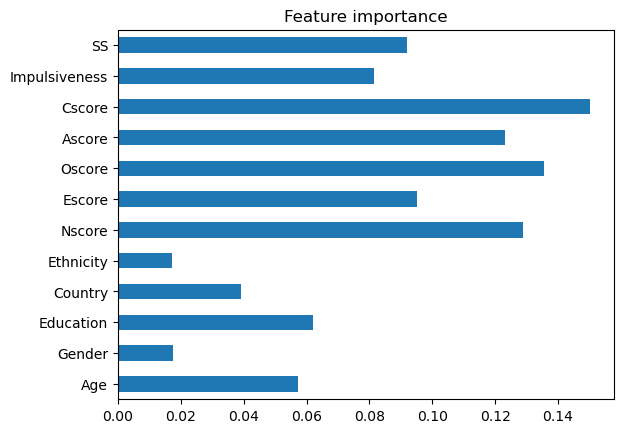

In [62]:
pd.Series(drvo_klasifikacije.feature_importances_, index=podaci_bez_klasa.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [64]:
report(drvo_klasifikacije, X_train, y_train)
# deluje da s preprilagodio

	Klasifikacioni izveštaj za model DecisionTreeClassifier nad trening podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       1.00      1.00      1.00        24
         CL1       1.00      1.00      1.00        24
         CL2       1.00      1.00      1.00        48
         CL3       1.00      1.00      1.00       138
         CL4       1.00      1.00      1.00       201
         CL5       1.00      1.00      1.00       531
         CL6       1.00      1.00      1.00       353

    accuracy                           1.00      1319
   macro avg       1.00      1.00      1.00      1319
weighted avg       1.00      1.00      1.00      1319

----------------------------------------------------------------------------------------------


In [65]:
report(drvo_klasifikacije, X_test, y_test, text= 'test')
# radi uzasno

	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00        10
         CL1       0.00      0.00      0.00        10
         CL2       0.00      0.00      0.00        20
         CL3       0.12      0.12      0.12        60
         CL4       0.15      0.16      0.16        86
         CL5       0.45      0.41      0.43       228
         CL6       0.29      0.32      0.30       152

    accuracy                           0.29       566
   macro avg       0.14      0.14      0.14       566
weighted avg       0.29      0.29      0.29       566

----------------------------------------------------------------------------------------------


In [66]:
# menjamo parametre
parametri =  {
    'criterion': ['gini', 'entropy'],
    'max_depth': [x for x in range(3, 30)],
    'max_features': [x for x in range(3, 40)]
}

balansirano_drvo = GridSearchCV(DecisionTreeClassifier(class_weight= 'balanced'), param_grid= parametri)
nebalansirano_drvo = GridSearchCV(DecisionTreeClassifier(), param_grid= parametri)

In [67]:
#pokusavamo sa balansiranim drvetom
balansirano_drvo.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29],
                         'max_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19, 20, 21, 22,
                                          23, 24, 25, 26, 27, 28, 29, 30, 31,
                                          32, ...]})

In [68]:
print(balansirano_drvo.best_params_)
print(balansirano_drvo.best_score_)

{'criterion': 'entropy', 'max_depth': 23, 'max_features': 8}
0.3252650074893421


In [69]:
report(balansirano_drvo.best_estimator_, X_test, y_test, 'test')

	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.14      0.10      0.12        10
         CL1       0.00      0.00      0.00        10
         CL2       0.00      0.00      0.00        20
         CL3       0.13      0.17      0.14        60
         CL4       0.22      0.19      0.20        86
         CL5       0.40      0.36      0.38       228
         CL6       0.35      0.39      0.37       152

    accuracy                           0.30       566
   macro avg       0.18      0.17      0.17       566
weighted avg       0.30      0.30      0.30       566

----------------------------------------------------------------------------------------------


In [70]:
#pokusavam bez balansiranog drveta
nebalansirano_drvo.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29],
                         'max_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19, 20, 21, 22,
                                          23, 24, 25, 26, 27, 28, 29, 30, 31,
                                          32, ...]})

In [71]:
print(balansirano_drvo.best_params_)
print(balansirano_drvo.best_score_)

{'criterion': 'entropy', 'max_depth': 23, 'max_features': 8}
0.3252650074893421


In [72]:
#pokusavam da klasifikujem svaku klasu sad... (mozda je problem samo u ovoj klasi)

In [138]:
#pravi skupove podataka pojedinacno bez svake klase
podaci_bez_klase = []
for x in atributi:
    podaci_bez_klase.append(podaci_bez_klasa.drop(x, axis = 1))
    
#klasni_podaci, isto to
klasni_podaci = []
n = len(klase)
for i in range(n):
    klasni_podaci.append(podaci[klase[i]])
# klasni_podaci[12]

In [147]:
#delimo podatke na train/test skupove
X_trains[i], X_tests[i], y_trains[i], y_tests[i] = [1 for _ in range(n)], [1 for _ in range(n)], [1 for _ in range(n)], [1 for _ in range(n)]
n = len(klase)
for i in range(n):
    X_trains[i], X_tests[i], y_trains[i], y_tests[i] = train_test_split(podaci_bez_klasa, klasni_podaci[i], test_size = 0.33,  random_state = 42)

#proverimo podatke (dobri su)
for i in range(n):
    print(X_trains[i].shape != X_trains[0].shape, end = ' ')


False False False False False False False False False False False False False False False False False False False 

In [149]:
# prvo pravimo stablo za svakog, i proveramo uspesnost
for i in range(n):
    drvo_klasifikacije = DecisionTreeClassifier()
    drvo_klasifikacije.fit(X_trains[i], y_trains[i])
    print(klase[i])
    report(drvo_klasifikacije, X_tests[i], y_tests[i], text= 'test')

Alchocol
	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.07      0.09      0.08        11
         CL1       0.00      0.00      0.00        11
         CL2       0.00      0.00      0.00        26
         CL3       0.10      0.11      0.10        63
         CL4       0.25      0.20      0.22       111
         CL5       0.42      0.36      0.39       254
         CL6       0.24      0.33      0.27       147

    accuracy                           0.27       623
   macro avg       0.15      0.16      0.15       623
weighted avg       0.28      0.27      0.27       623

----------------------------------------------------------------------------------------------
Amphet
	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
-----------------------------------------------

	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.82      0.80      0.81       464
         CL1       0.00      0.00      0.00        11
         CL2       0.17      0.18      0.17        34
         CL3       0.17      0.19      0.18        54
         CL4       0.10      0.06      0.08        16
         CL5       0.06      0.05      0.06        19
         CL6       0.00      0.00      0.00        25

    accuracy                           0.62       623
   macro avg       0.19      0.18      0.18       623
weighted avg       0.64      0.62      0.63       623

----------------------------------------------------------------------------------------------
Mushrooms
	Klasifikacioni izveštaj za model DecisionTreeClassifier nad test podacima
-----------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packa

In [150]:
#BALANSIRANO DRVO, SA PODESENIM PARAMETRIMA
for i in range(n):
    balansirano_drvo.fit(X_trains[i], y_trains[i])
    print(f'{klase[i]}: {balansirano_drvo.best_score_}')

Alchocol: 0.3240949871384654
Amphet: 0.4191448647970387


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Amyl: 0.5761183261183261
Benzos: 0.41761402848359364
Caff: 0.5824267519919694
Canabis: 0.3169960474308301


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Choc: 0.37241043980174415
Coke: 0.44531024531024527


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Crack: 0.7884653993349645
Ecstasy: 0.4524687872513959
Heroin: 0.7773574251835121


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Ketamin: 0.6933684672815108
LegalH: 0.535670368279064
LSD: 0.5103049124788255
Meth: 0.6672156346069389
Mushrooms: 0.474640818119079
Nicotine: 0.27658259614781355


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Semer: 0.9952475061170712


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


VSA: 0.6679622310057093
